In [14]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [15]:
# display dataset as a Pandas DataFrame

data = pd.read_csv('Resources/COVID_staff_shortages.csv')
data

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,ME,2021/01/23,1,30,8,2,29,8,3.0,38,...,NaN,0,NaN,0,NaN,0,47.0,38,60.0,38
1,SD,2021/01/23,2,60,3,2,60,3,27.0,62,...,NaN,0,NaN,0,NaN,0,36.0,62,83.0,62
2,MD,2021/01/22,2,57,1,2,57,1,31.0,59,...,NaN,0,NaN,0,NaN,0,172.0,59,240.0,59
3,RI,2021/01/22,6,8,1,6,8,1,6.0,14,...,NaN,0,NaN,0,NaN,0,62.0,14,93.0,14
4,ID,2021/01/21,4,40,8,5,39,8,0.0,51,...,NaN,0,NaN,0,NaN,0,82.0,30,230.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54006,MT,2021/03/29,6,58,1,7,57,1,3.0,64,...,NaN,0,NaN,0,NaN,0,8.0,9,18.0,9
54007,NJ,2021/03/09,9,61,8,10,60,8,76.0,77,...,NaN,0,NaN,0,NaN,0,49.0,24,107.0,24
54008,NM,2021/05/19,12,43,1,16,39,1,2.0,55,...,NaN,0,NaN,0,NaN,0,0.0,19,0.0,19
54009,NE,2021/04/15,9,91,1,16,84,1,1.0,100,...,NaN,0,NaN,0,NaN,0,0.0,12,0.0,12


## Hypotheses

### 1)  Month of Year  vs.  Shortages
        Null: There is no relationship between months of the year and critical staffing shortages.
        Alternative: There is a relationship between months of the year and critical staffing shortages.
        
### 2)  Week of Month  vs.  Shortages
        Null: There is no relationship between the week of the month and critical staffing shortages.
        Alternative: There is a relationship between the week of the month and critical staffing shortages.
        
### 3)  Day of Week  vs.  Shortages
        Null: There is no relationship between days of the week and critical staffing shortages.
        Alternative: There is a relationship between days of the week and critical staffing shortages.

# Month of the Year vs Shortages

In [16]:
data.insert(2, 'year', '')
data.insert(2, 'month', '')
data.insert(2, 'day', '')

In [17]:
data[['year', 'month', 'day']] = data['date'].str.split('/', 2, expand=True)
sum_by_year = data.groupby(by=['year','month']).sum()
sum_by_year = sum_by_year.reset_index()
sum_by_year

,year,month,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,2020,01,80,220,286,90,210,286,165.0,503,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
1,2020,02,0,0,361,0,0,361,0.0,284,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
2,2020,03,0,6,12595,0,6,12595,1110.0,6866,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
3,2020,04,30,257,130950,30,257,130950,20378.0,81524,...,0.0,0,0.0,0,0.0,0,0.0,10,0.0,10
4,2020,05,6,235,165222,62,196,165205,32731.0,127751,...,0.0,0,0.0,0,0.0,0,0.0,30,0.0,30
5,2020,06,48,442,162168,95,403,162160,20757.0,123221,...,0.0,0,0.0,0,0.0,0,0.0,30,0.0,30
6,2020,07,10034,39506,116819,11639,36650,118070,29804.0,126571,...,0.0,0,0.0,0,2649.0,43845,116615.0,37372,184189.0,34563
7,2020,08,24221,107763,42211,28105,103891,42199,31596.0,152334,...,0.0,0,0.0,0,2863.0,95788,239075.0,92534,389684.0,87798
8,2020,09,25951,123922,24345,30052,120664,23502,27736.0,158577,...,0.0,0,0.0,0,2007.0,99590,231709.0,98150,395270.0,94642
9,2020,10,29044,144423,10750,34072,138388,11757,33950.0,176062,...,0.0,0,0.0,0,2161.0,73009,284636.0,112539,472494.0,110586


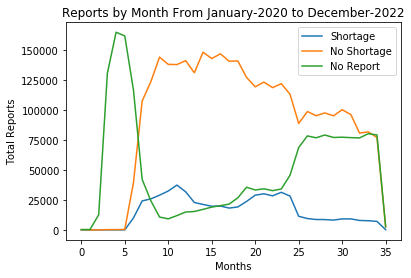

<Figure size 432x288 with 0 Axes>

In [44]:
# plot all REPORTS (YES, NO, NOT REPORTED) for critical staffing shortage by EACH MONTH OVER the dataset
plt.plot(sum_by_year['critical_staffing_shortage_today_yes'])
plt.plot(sum_by_year['critical_staffing_shortage_today_no'])
plt.plot(sum_by_year['critical_staffing_shortage_today_not_reported'])
plt.legend(['Shortage', 'No Shortage', 'No Report'])
plt.ylabel('Total Reports')
plt.xlabel('Months')
plt.title('Reports by Month From {} to {}'.format(datetime.strptime(data['date'].min(), '%Y/%m/%d').strftime('%B-%Y'),
                                               datetime.strptime(data['date'].max(), '%Y/%m/%d').strftime('%B-%Y')
                                              ))
plt.show()
plt.savefig('output/1-1.png')